In [1]:
# CML3014N Machine Learning Assignment 2
# Data Source:
#     1. Student Performance https://archive.ics.uci.edu/dataset/320/student+performance
#     2. Wine Quality https://archive.ics.uci.edu/dataset/186/wine+quality

# Dataset Description:
#    1. Student Performance mixed dataset with both numerical and categorical data
#       G1, G2, G3 - numerical from 0 to 20 (the target variable. G3 is the final grade)
#    2. Wine Quality dataset with numerical continuous
#       quality - score between 0 and 10 (the target variable)

# Import Necessary Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Step 1: Preprocess Data Function
def preprocess_data(df):
    """
    Convert non-numeric columns to numeric using one-hot encoding or label encoding.

    Args:
        df (DataFrame): The input DataFrame to preprocess.

    Returns:
        DataFrame: The preprocessed DataFrame with all numeric columns.
    """
    # Convert non-numeric columns to numeric using one-hot encoding
    df = pd.get_dummies(df, drop_first=True)

    # Convert all columns to a numeric type (in case of any anomalies)
    df = df.apply(pd.to_numeric, errors='coerce')

    # Drop any rows with NaN values that might result from the conversion
    df = df.dropna()

    return df

In [3]:
# Step 2: Load the dataset
wineRed_df = pd.read_csv('data/winequality-red.csv', delimiter=';')
wineWhite_df = pd.read_csv('data/winequality-white.csv', delimiter=';')
stdMath_df = pd.read_csv('data/student-mat.csv', delimiter=';')
stdPor_df = pd.read_csv('data/student-por.csv', delimiter=';')

stdMath_df = preprocess_data(stdMath_df)
stdPor_df = preprocess_data(stdPor_df)

# Display the first few rows of the dataset
print("Wine Red Dataset")
print("Total number of columns: ", wineRed_df.shape[1], "Total number of rows: ", wineRed_df.shape[0])
display(wineRed_df.head())

print("Wine White Dataset")
print("Total number of columns: ", wineWhite_df.shape[1], "Total number of rows: ", wineWhite_df.shape[0])
display(wineWhite_df.head())

print("Student Math Dataset")
print("Total number of columns: ", stdMath_df.shape[1], "Total number of rows: ", stdMath_df.shape[0])
display(stdMath_df.head())

print("Student Portuguese Dataset")
print("Total number of columns: ", stdPor_df.shape[1], "Total number of rows: ", stdPor_df.shape[0])
display(stdPor_df.head())

Wine Red Dataset
Total number of columns:  12 Total number of rows:  1599


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Wine White Dataset
Total number of columns:  12 Total number of rows:  4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Student Math Dataset
Total number of columns:  42 Total number of rows:  395


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


Student Portuguese Dataset
Total number of columns:  42 Total number of rows:  649


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,True,False,False,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,False,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,False,False,True,True,False,False


In [4]:
# Step 3: Split the dataset into training and testing
# * Use 80% of the data for training and 20% for testing
# * For each dataset, split into input features and target
# * For wine dataset, the target is quality
# * For student dataset, the target is G3

# Step 3.1 Split the wine dataset with train_test_split, x is features, y is target
wineRed_x = wineRed_df.drop(columns=['quality'])
wineRed_y = wineRed_df['quality']  # Target variable
wineRed_x_train, wineRed_x_test, wineRed_y_train, wineRed_y_test = train_test_split(
    wineRed_x, wineRed_y, test_size=0.2, random_state=42)

wineWhite_x = wineWhite_df.drop(columns=['quality'])
wineWhite_y = wineWhite_df['quality']  # Target variable
wineWhite_x_train, wineWhite_x_test, wineWhite_y_train, wineWhite_y_test = train_test_split(
    wineWhite_x, wineWhite_y, test_size=0.2, random_state=42)

# Step 3.2 Split the student dataset with train_test_split, x is features, y is target
stdMath_x = stdMath_df.drop(columns=['G3'])
stdMath_y = stdMath_df['G3']  # Target variable
stdMath_x_train, stdMath_x_test, stdMath_y_train, stdMath_y_test = train_test_split(
    stdMath_x, stdMath_y, test_size=0.2, random_state=42)

stdPor_x = stdPor_df.drop(columns=['G3'])
stdPor_y = stdPor_df['G3']  # Target variable
stdPor_x_train, stdPor_x_test, stdPor_y_train, stdPor_y_test = train_test_split(
    stdPor_x, stdPor_y, test_size=0.2, random_state=42)

In [5]:
# Step 4: Train, Evaluate, and Visualize with Random Forest
# A function to train and evaluate Random Forest models
def train_and_evaluate_rf(model, x_train, y_train, x_test, y_test, title):
    # Train the Random Forest model
    model.fit(x_train, y_train)

    # Predict target values
    y_pred = model.predict(x_test)

    # Evaluate model performance with error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Display metrics in a formatted table
    print(f"Evaluation Metrics for {title}")
    table = pd.DataFrame({
        "Mean Absolute Error": [mae],
        "Mean Squared Error": [mse],
        "Root Mean Squared Error": [rmse],
        "R2 Score": [r2]
    })
    display(table)

    # Plot predicted vs actual target values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'Prediction vs Actual Target - {title}')
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.tight_layout()
    plt.savefig("output/" + title.replace(" ", "_") + ".png", dpi=600)
    plt.show()

# Step 4.1 Build Random Forest Regressors
# Define a general-purpose Random Forest model
def create_rf_model():
    return RandomForestRegressor(
        n_estimators=100,          # Number of trees
        max_depth=None,            # No depth limit
        random_state=42,           # Reproducibility
        n_jobs=-1,                 # Use all available cores
        max_features='sqrt'        # Best practice for Random Forest
    )

# Instantiate models for each dataset
rf_wineRed = create_rf_model()
rf_wineWhite = create_rf_model()
rf_stdMath = create_rf_model()
rf_stdPor = create_rf_model()

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.414594,0.296093,0.544144,0.546916


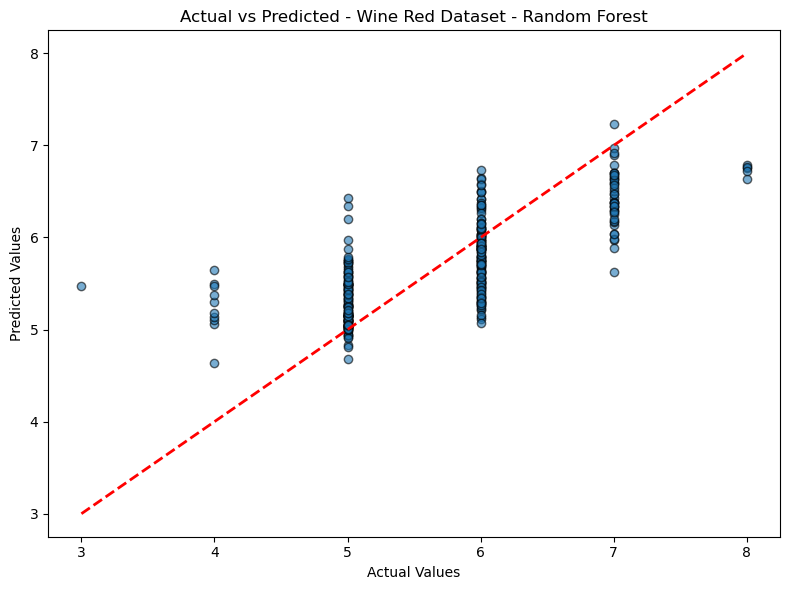

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.414163,0.334843,0.578656,0.567651


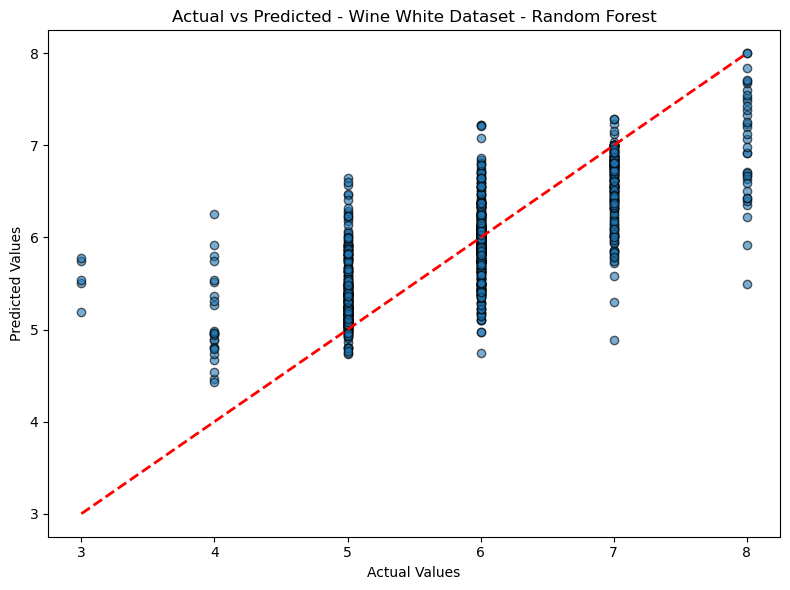

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,1.592785,5.079247,2.253718,0.752293


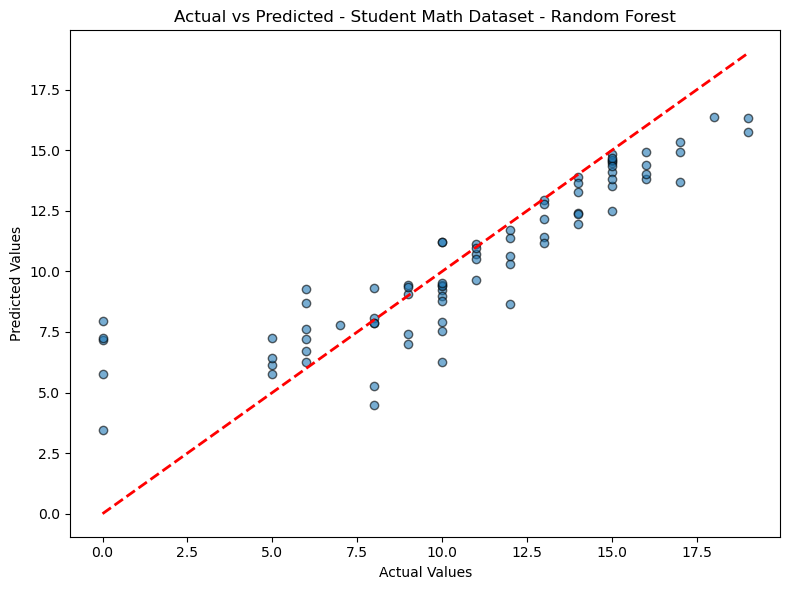

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.951,2.100127,1.449181,0.78464


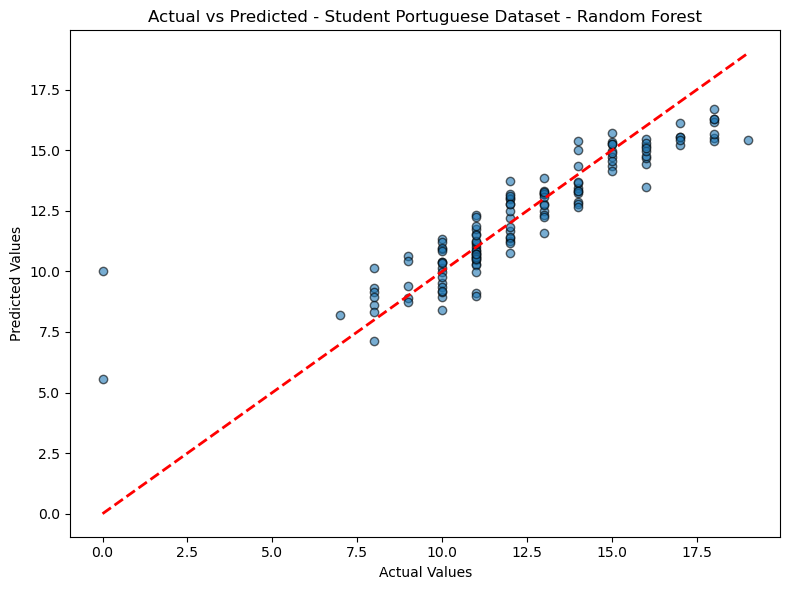

In [6]:
# Define the train_and_evaluate function
def train_and_evaluate(model, x_train, y_train, x_test, y_test, title):
    """
    Trains the given model, evaluates it on the test data, and visualizes the results.

    Args:
        model: The regression model to train.
        x_train: Training features.
        y_train: Training target variable.
        x_test: Testing features.
        y_test: Testing target variable.
        title: Title for the evaluation and plots.
    """
    # Train the model
    model.fit(x_train, y_train)

    # Predict target values for the test set
    y_pred = model.predict(x_test)

    # Evaluate model performance using various metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Display metrics in a table
    metrics_df = pd.DataFrame({
        "Mean Absolute Error": [mae],
        "Mean Squared Error": [mse],
        "Root Mean Squared Error": [rmse],
        "R2 Score": [r2]
    })
    display(metrics_df)

    # Create a scatter plot of actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted - {title}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.tight_layout()
    plt.savefig("output/" + title.replace(" ", "_") + ".png", dpi=600)
    plt.show()

# Example usage with corrected model names
# For Red Wine Dataset
train_and_evaluate(rf_wineRed, wineRed_x_train, wineRed_y_train, wineRed_x_test, wineRed_y_test, 'Wine Red Dataset - Random Forest')

# For White Wine Dataset
train_and_evaluate(rf_wineWhite, wineWhite_x_train, wineWhite_y_train, wineWhite_x_test, wineWhite_y_test, 'Wine White Dataset - Random Forest')

# For Student Math Dataset
train_and_evaluate(rf_stdMath, stdMath_x_train, stdMath_y_train, stdMath_x_test, stdMath_y_test, 'Student Math Dataset - Random Forest')

# For Student Portuguese Dataset
train_and_evaluate(rf_stdPor, stdPor_x_train, stdPor_y_train, stdPor_x_test, stdPor_y_test, 'Student Portuguese Dataset - Random Forest')

Tuning Wine Red Dataset using RandomizedSearchCV...
Performing randomized search for Wine Red Dataset...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Wine Red Dataset: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 40}
Best Score for Wine Red Dataset: -0.37258503972136203


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.429509,0.310661,0.55737,0.524624


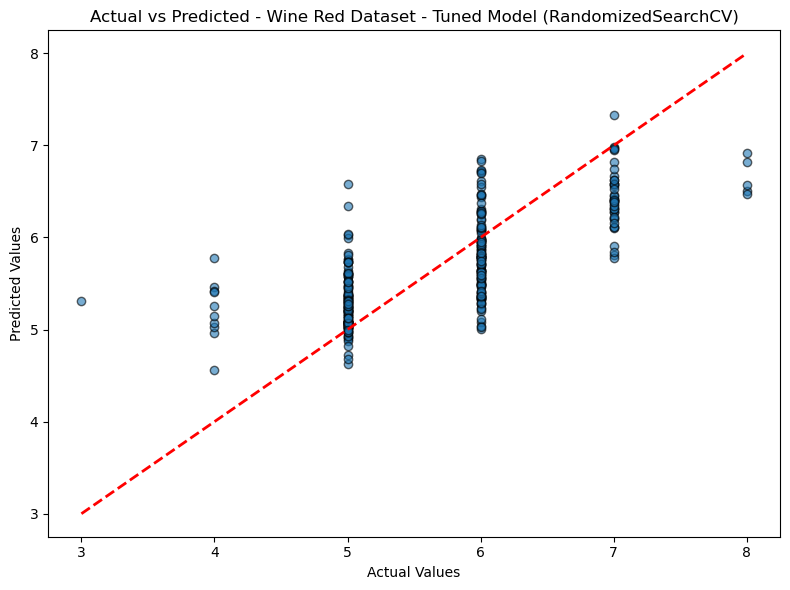

Tuning Wine Red Dataset using GridSearchCV...
Performing grid search for Wine Red Dataset...
Fitting 5 folds for each of 400 candidates, totalling 2000 fits


C:\Users\seowf\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for Wine Red Dataset: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score for Wine Red Dataset: -0.3680703180147059


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.42375,0.306442,0.553572,0.53108


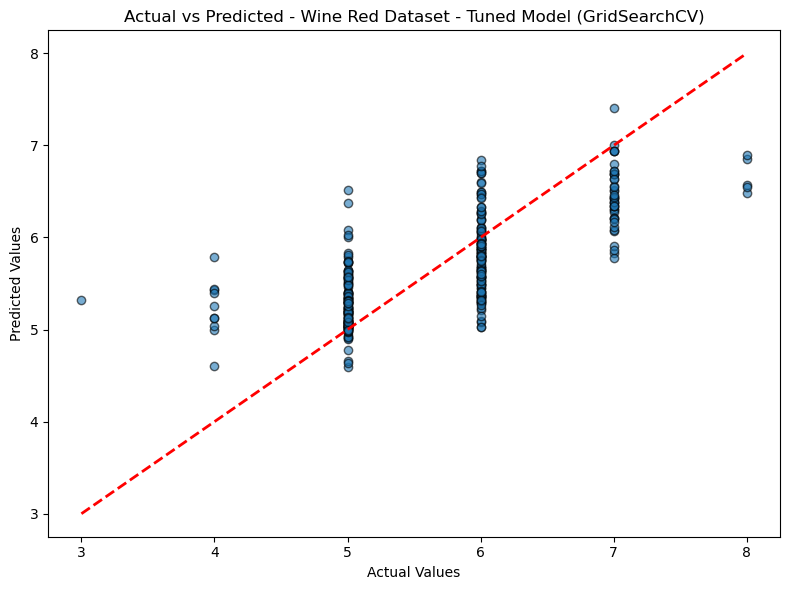

Tuning Wine White Dataset using RandomizedSearchCV...
Performing randomized search for Wine White Dataset...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Wine White Dataset: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 40}
Best Score for Wine White Dataset: -0.4009747205968311


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.426434,0.350306,0.591866,0.547685


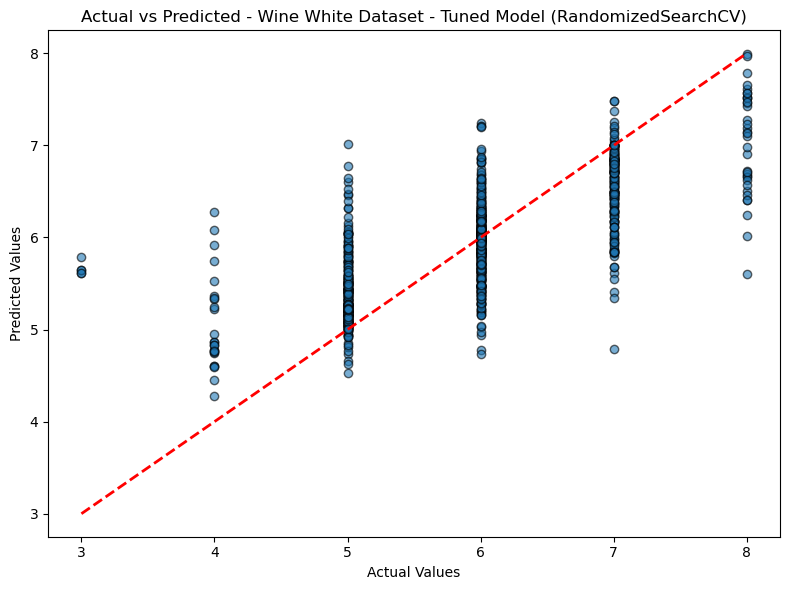

Tuning Wine White Dataset using GridSearchCV...
Performing grid search for Wine White Dataset...
Fitting 5 folds for each of 400 candidates, totalling 2000 fits


C:\Users\seowf\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for Wine White Dataset: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score for Wine White Dataset: -0.3964056412929261


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.416756,0.345322,0.587641,0.554121


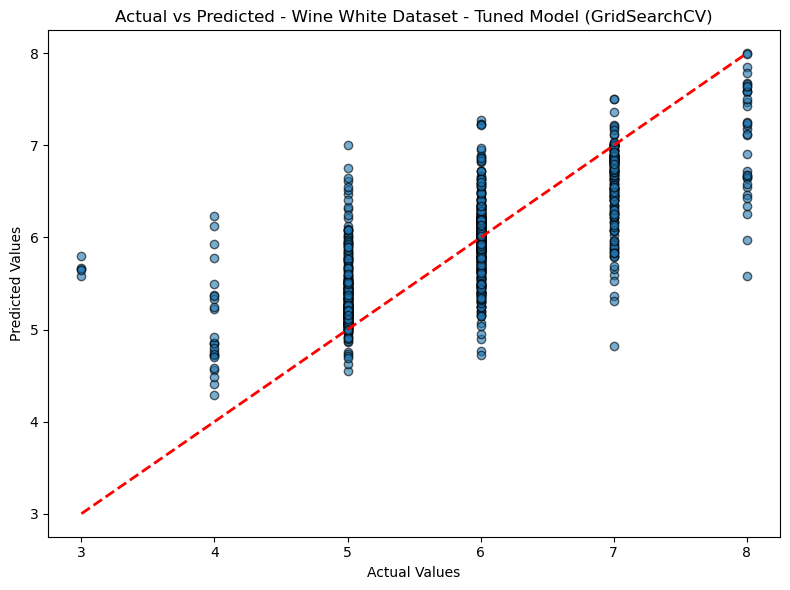

Tuning Student Math Dataset using RandomizedSearchCV...
Performing randomized search for Student Math Dataset...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Student Math Dataset: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Best Score for Student Math Dataset: -2.0385773124239663


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,1.168841,3.895288,1.973648,0.810033


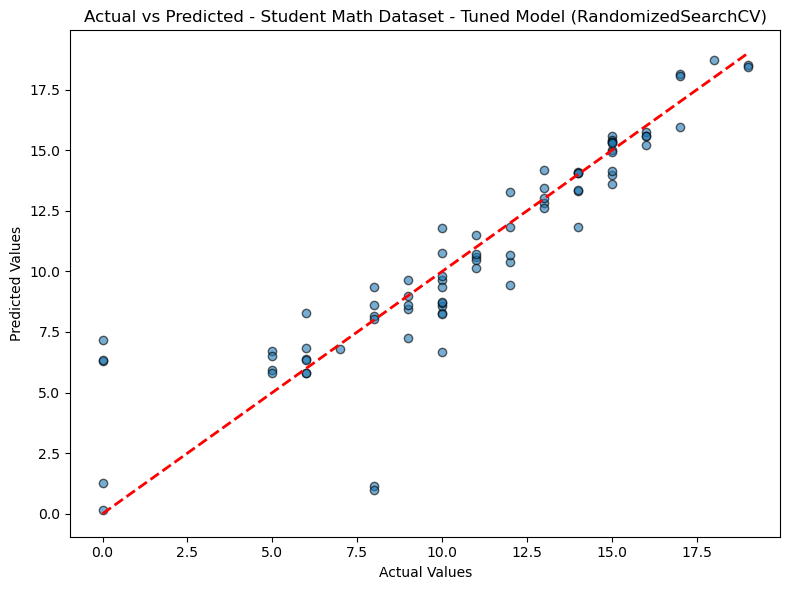

Tuning Student Math Dataset using GridSearchCV...
Performing grid search for Student Math Dataset...
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best Parameters for Student Math Dataset: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score for Student Math Dataset: -2.0287366914682545


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,1.164557,3.797716,1.948773,0.814791


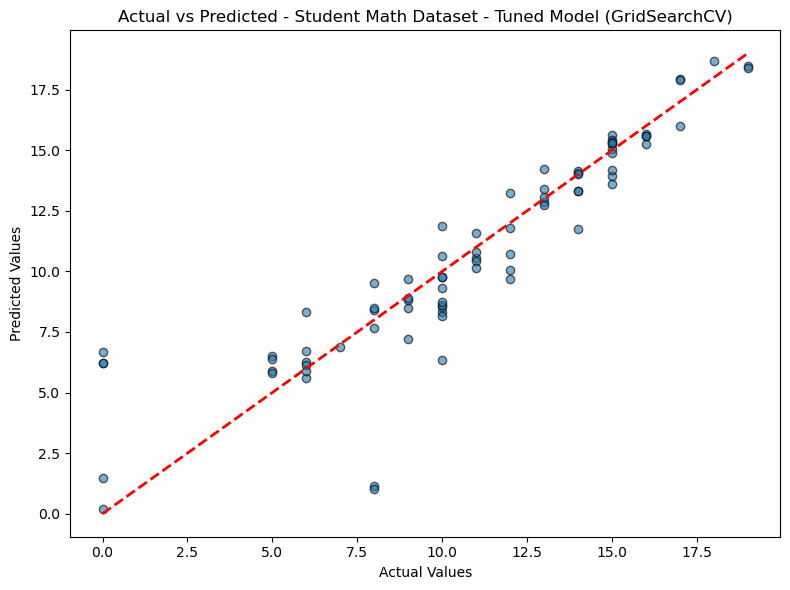

Tuning Student Portuguese Dataset using RandomizedSearchCV...
Performing randomized search for Student Portuguese Dataset...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Student Portuguese Dataset: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None}
Best Score for Student Portuguese Dataset: -1.5620315596044883


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,0.701822,1.477025,1.215329,0.848537


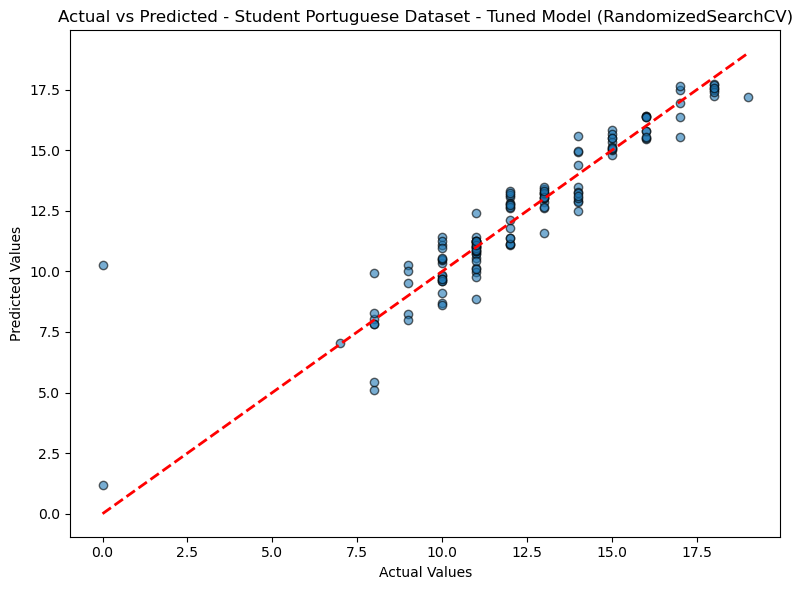

Tuning Student Portuguese Dataset using GridSearchCV...
Performing grid search for Student Portuguese Dataset...
Fitting 5 folds for each of 400 candidates, totalling 2000 fits


In [ ]:
# Hyperparameter distributions for RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Function to perform hyperparameter tuning using RandomizedSearchCV
def perform_randomized_search(model, param_dist, x_train, y_train, dataset_name, n_iter=10):
    """
    Perform randomized search for hyperparameter tuning and return the best model.

    Args:
        model: Base model for hyperparameter tuning.
        param_dist: Dictionary of parameters to tune.
        x_train: Training features.
        y_train: Training target variable.
        dataset_name: Name of the dataset for reporting.
        n_iter: Number of random parameter combinations to sample.

    Returns:
        Best model after hyperparameter tuning.
    """
    print(f"Performing randomized search for {dataset_name}...")
    randomized_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring='neg_mean_squared_error',
        cv=5,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )
    randomized_search.fit(x_train, y_train)
    print(f"Best Parameters for {dataset_name}: {randomized_search.best_params_}")
    print(f"Best Score for {dataset_name}: {randomized_search.best_score_}")
    return randomized_search.best_estimator_

# Function to perform hyperparameter tuning using GridSearchCV
def perform_grid_search(model, param_grid, x_train, y_train, dataset_name):
    """
    Perform grid search for hyperparameter tuning and return the best model.

    Args:
        model: Base model for hyperparameter tuning.
        param_grid: Dictionary of parameters to tune.
        x_train: Training features.
        y_train: Training target variable.
        dataset_name: Name of the dataset for reporting.

    Returns:
        Best model after hyperparameter tuning.
    """
    print(f"Performing grid search for {dataset_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=5,
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(x_train, y_train)
    print(f"Best Parameters for {dataset_name}: {grid_search.best_params_}")
    print(f"Best Score for {dataset_name}: {grid_search.best_score_}")
    return grid_search.best_estimator_

# Step 5: Perform hyperparameter tuning and evaluation for Student Math and Student Portuguese datasets

# Wine Red Dataset - RandomizedSearchCV
print("Tuning Wine Red Dataset using RandomizedSearchCV...")
wineModel_tuned_rf_random = perform_randomized_search(
    RandomForestRegressor(random_state=42),
    param_dist_rf,
    wineRed_x_train,
    wineRed_y_train,
    "Wine Red Dataset",
    n_iter=20  # Increase n_iter for more comprehensive search
)
train_and_evaluate(
    wineModel_tuned_rf_random,
    wineRed_x_train,
    wineRed_y_train,
    wineRed_x_test,
    wineRed_y_test,
    'Wine Red Dataset - Tuned Model (RandomizedSearchCV)'
)

# Wine Red Dataset - GridSearchCV
print("Tuning Wine Red Dataset using GridSearchCV...")
wineModel_tuned_rf_grid = perform_grid_search(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    wineRed_x_train,
    wineRed_y_train,
    "Wine Red Dataset"
)
train_and_evaluate(
    wineModel_tuned_rf_grid,
    wineRed_x_train,
    wineRed_y_train,
    wineRed_x_test,
    wineRed_y_test,
    'Wine Red Dataset - Tuned Model (GridSearchCV)'
)

# Wine White Dataset - RandomizedSearchCV
print("Tuning Wine White Dataset using RandomizedSearchCV...")
wineModel_tuned_rf_white_random = perform_randomized_search(
    RandomForestRegressor(random_state=42),
    param_dist_rf,
    wineWhite_x_train,
    wineWhite_y_train,
    "Wine White Dataset",
    n_iter=20
)
train_and_evaluate(
    wineModel_tuned_rf_white_random,
    wineWhite_x_train,
    wineWhite_y_train,
    wineWhite_x_test,
    wineWhite_y_test,
    'Wine White Dataset - Tuned Model (RandomizedSearchCV)'
)

# Wine White Dataset - GridSearchCV
print("Tuning Wine White Dataset using GridSearchCV...")
wineModel_tuned_rf_white_grid = perform_grid_search(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    wineWhite_x_train,
    wineWhite_y_train,
    "Wine White Dataset"
)
train_and_evaluate(
    wineModel_tuned_rf_white_grid,
    wineWhite_x_train,
    wineWhite_y_train,
    wineWhite_x_test,
    wineWhite_y_test,
    'Wine White Dataset - Tuned Model (GridSearchCV)'
)

# Student Math Dataset - RandomizedSearchCV
print("Tuning Student Math Dataset using RandomizedSearchCV...")
studentMathModel_tuned_rf_random = perform_randomized_search(
    RandomForestRegressor(random_state=42),
    param_dist_rf,
    stdMath_x_train,
    stdMath_y_train,
    "Student Math Dataset",
    n_iter=20  # Increase n_iter for more comprehensive search
)
train_and_evaluate(
    studentMathModel_tuned_rf_random,
    stdMath_x_train,
    stdMath_y_train,
    stdMath_x_test,
    stdMath_y_test,
    'Student Math Dataset - Tuned Model (RandomizedSearchCV)'
)

# Student Math Dataset - GridSearchCV
print("Tuning Student Math Dataset using GridSearchCV...")
studentMathModel_tuned_rf_grid = perform_grid_search(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    stdMath_x_train,
    stdMath_y_train,
    "Student Math Dataset"
)
train_and_evaluate(
    studentMathModel_tuned_rf_grid,
    stdMath_x_train,
    stdMath_y_train,
    stdMath_x_test,
    stdMath_y_test,
    'Student Math Dataset - Tuned Model (GridSearchCV)'
)

# Student Portuguese Dataset - RandomizedSearchCV
print("Tuning Student Portuguese Dataset using RandomizedSearchCV...")
studentPorModel_tuned_rf_random = perform_randomized_search(
    RandomForestRegressor(random_state=42),
    param_dist_rf,
    stdPor_x_train,
    stdPor_y_train,
    "Student Portuguese Dataset",
    n_iter=20
)
train_and_evaluate(
    studentPorModel_tuned_rf_random,
    stdPor_x_train,
    stdPor_y_train,
    stdPor_x_test,
    stdPor_y_test,
    'Student Portuguese Dataset - Tuned Model (RandomizedSearchCV)'
)

# Student Portuguese Dataset - GridSearchCV
print("Tuning Student Portuguese Dataset using GridSearchCV...")
studentPorModel_tuned_rf_grid = perform_grid_search(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    stdPor_x_train,
    stdPor_y_train,
    "Student Portuguese Dataset"
)
train_and_evaluate(
    studentPorModel_tuned_rf_grid,
    stdPor_x_train,
    stdPor_y_train,
    stdPor_x_test,
    stdPor_y_test,
    'Student Portuguese Dataset - Tuned Model (GridSearchCV)'
)